In [1]:
import os

import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
from matplotlib import pylab as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
from dota_ml.data import data_url, transform_data
from dota_ml.utils import generate_grid, make_submission, plot_feature_ranking, plot_feature_ranking

In [3]:
if not os.path.exists('data/'):
    !wget $data_url -q --show-progress
    !tar -xvf data.tar.gz
else:
    print('Data already exists!')

Data already exists!


In [4]:
data_params = {
    'scale': True,
    
    'gold_features': True,
    'lh_features': True,
    'xp_features': True,
    
#     'heroes_by_player': True, 
#     'heroes_by_team': True,
    'vector_heroes': True,
#     'bigram_heroes': True,
    
    'events_features': True,
    
#     'items_by_player': True,
#     'items_by_team': True,
    'vector_items': True
}

train_df, test_df = transform_data(**data_params)

Adding 'last_gold_by_player'...
Adding 'last_gold_by_team'...
Adding 'gold_speed_by_player'...
Adding 'gold_speed_by_team'...
Adding 'max_gold_by_player'...
Adding 'max_gold_by_team'...
Adding 'last_lh_by_player'...
Adding 'last_lh_by_team'...
Adding 'lh_speed_by_player'...
Adding 'lh_speed_by_team'...
Adding 'max_lh_by_player'...
Adding 'max_lh_by_team'...
Adding 'last_xp_by_player'...
Adding 'last_xp_by_team'...
Adding 'xp_speed_by_player'...
Adding 'xp_speed_by_team'...
Adding 'max_xp_by_player'...
Adding 'max_xp_by_team'...
Scaling...
Adding vector heroes...
Adding bigram heroes...
Adding 'events_features'...
Adding vector items features...


In [5]:
X_train = train_df.drop('radiant_won', axis=1)
print('X_train.shape={}'.format(X_train.shape))

y_train = train_df['radiant_won']
print('y_train.shape={}'.format(y_train.shape))

X_test = test_df
print('X_test.shape={}'.format(X_test.shape))

X_train.shape=(24974, 6459)
y_train.shape=(24974,)
X_test.shape=(24974, 6459)


In [7]:
scoring = 'roc_auc'
k_folds = 3

estimator_params = {
    'max_iter': 1000,
    'penalty': 'l1',
    'C': 0.1,
    
    'verbose': 1
}

In [8]:
scores = cross_val_score(LogisticRegression(**estimator_params),
                         X_train, y_train,
                         cv=k_folds, scoring=scoring,
                         n_jobs=-1, verbose=2)

score = np.mean(scores)
print('score: {}'.format(score))

[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[LibLinear][CV] ................................................. , total=35.1min
[LibLinear][CV] ................................................. , total=38.9min
[LibLinear][CV] ................................................. , total=38.8min
score: 0.766904260479218


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 39.1min finished


In [9]:
estimator = LogisticRegression(**estimator_params)
estimator.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=1, warm_start=False)

In [10]:
make_submission(pd.DataFrame(X_test, index=test_df.index), estimator,
                'submissions/', 'logreg', {**data_params, **estimator_params}, score)

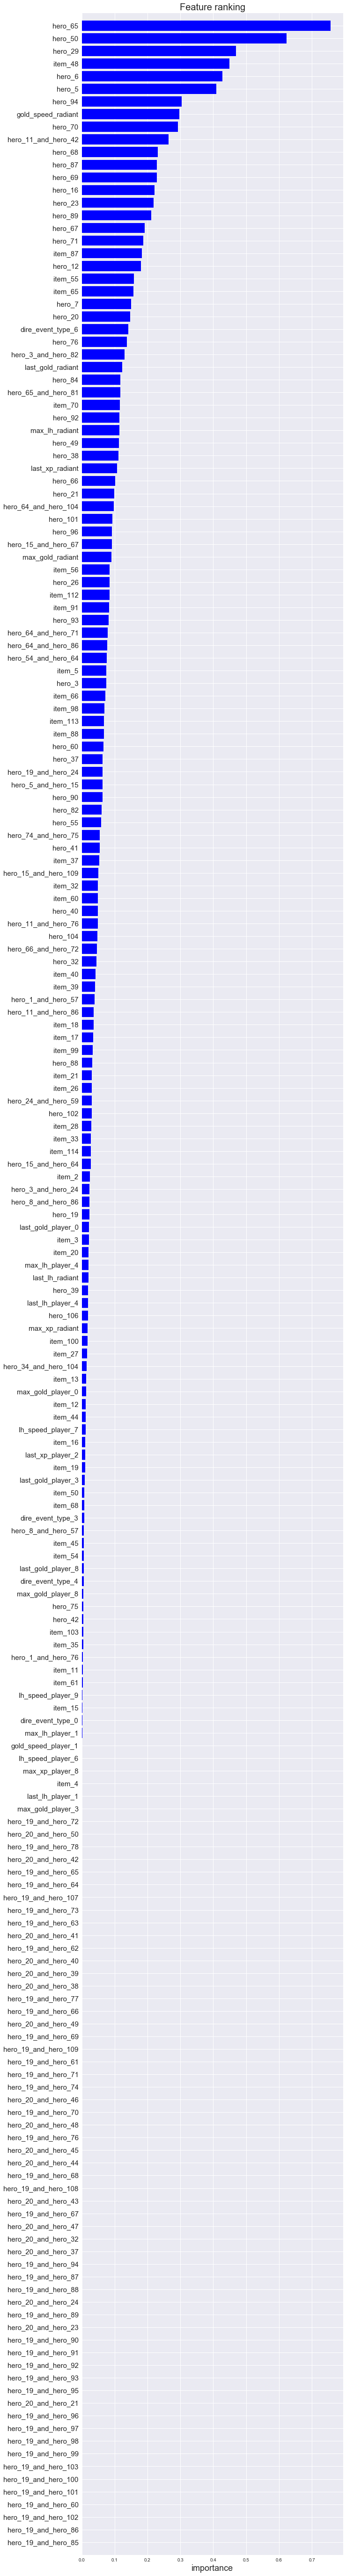

In [11]:
if hasattr(X_test, 'columns'):
    plot_feature_ranking(estimator.coef_.squeeze(), X_test.columns, max_n_importances=200)
else:
    print('features\' column names are not avaliable')

---